<center><h1>HosseinzadehKhaligh_Ehsan_HW7</h1></center>

Name: Ehsan Hosseinzadeh Khaligh
<br>
Github Username: EhsanKhaligh
<br>
USC ID: 1112811250

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import time

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import hamming_loss
from scipy.spatial.distance import hamming as hamming_distance

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### (a) Download the Anuran Calls (MFCCs) Data Set

In [3]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [4]:
df.shape

(7195, 26)

In [5]:
list(df.columns.values.tolist())

['MFCCs_ 1',
 'MFCCs_ 2',
 'MFCCs_ 3',
 'MFCCs_ 4',
 'MFCCs_ 5',
 'MFCCs_ 6',
 'MFCCs_ 7',
 'MFCCs_ 8',
 'MFCCs_ 9',
 'MFCCs_10',
 'MFCCs_11',
 'MFCCs_12',
 'MFCCs_13',
 'MFCCs_14',
 'MFCCs_15',
 'MFCCs_16',
 'MFCCs_17',
 'MFCCs_18',
 'MFCCs_19',
 'MFCCs_20',
 'MFCCs_21',
 'MFCCs_22',
 'Family',
 'Genus',
 'Species',
 'RecordID']

In [6]:
# Split the data into training and testing sets with a 70:30 ratio
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Print the number of rows in each set
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))


Training set size: 5036
Testing set size: 2159


In [7]:
selected_cols = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']
X_train_data = train_data.loc[:, selected_cols]
X_test_data = test_data.loc[:, selected_cols]

#all labels
selected_cols = ['Family','Genus','Species']
y_train_data = train_data.loc[:, selected_cols]
y_test_data = test_data.loc[:, selected_cols]

#each label
y_train_data_family = y_train_data['Family']
y_train_data_genus = y_train_data['Genus']
y_train_data_species = y_train_data['Species']

y_test_data_family = y_test_data['Family']
y_test_data_genus = y_test_data['Genus']
y_test_data_species = y_test_data['Species']



### (b) Train a classifier for each label

In [8]:
print("Family:")
display(df['Family'].value_counts())
print("Genus:")
display(df['Genus'].value_counts())
print("Species:")
display(df['Species'].value_counts())

Family:


Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Genus:


Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

Species:


AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

#### (i) Research

Exact match and hamming score/loss are two commonly used evaluation metrics for multilabel classification problems. Here's a brief overview of each:

Exact match (also known as accuracy): This metric measures the proportion of instances in the dataset where the predicted labels exactly match the true labels. In other words, it calculates the fraction of correctly predicted samples out of the total number of samples. Exact match is a strict measure of performance and penalizes even small errors in the predictions.

Hamming score/loss: This metric calculates the proportion of labels that are predicted correctly across all samples in the dataset. The hamming score is the ratio of the number of correctly predicted labels to the total number of labels in the dataset, while the hamming loss is the ratio of the number of mispredicted labels to the total number of labels. Hamming score/loss is a more relaxed measure of performance that allows for some degree of error in the predictions.

#### (ii) Train a SVM for each of the labels

In [9]:
labels_train_list = [y_train_data_family, y_train_data_genus, y_train_data_species]
labels_test_list = [y_test_data_family, y_test_data_genus, y_test_data_species]

names = ['Family', 'Genus', 'Species']
count=0

params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}


for y_train_item, y_test_item in zip(labels_train_list, labels_test_list):
    
    #print("y_train_label:\n", y_train_item) #debug
    #print("--------") #debug
    #print("y_test_label:\n", y_test_item) #debug
    #print() #debug
    
    # Convert class labels to numerical values
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train_item)
    y_test_encoded = le.transform(y_test_item) 
    
    #print("y_train_encoded:\n", y_train_encoded) #debug
    #print("--------") #debug
    #print("y_test_encoded:\n", y_test_encoded) #debug
    #print("y_test_encoded.reshape(-1, 1):\n", y_test_encoded.reshape(-1, 1)) #debug
    
    
    # Use grid search to find the best values of C and gamma
    grid_search = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), params, scoring='accuracy', cv=10)    
    grid_search.fit(X_train_data, y_train_encoded)

    # Print the best parameter values and the accuracy score
    print('Label {}: best C={}, best gamma={}, best score={}'.format(names[count], grid_search.best_params_['C'], grid_search.best_params_['gamma'], grid_search.best_score_))
    # Train the SVM with the best parameter values on the entire dataset
    clf = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], decision_function_shape='ovr')
    clf.fit(X_train_data, y_train_encoded)
    
    y_predict = clf.predict(X_test_data)
    y_predict_label = le.inverse_transform(y_predict)
    #print("y_predict_label:", y_predict_label[:3]) #debug
    
    count = count + 1
    
    # Calculate the Hamming score
    score = 1 - hamming_loss(y_test_item, y_predict_label)
    print("Hamming score/loss: ", score) 
    
    # Calculate the exact match score
    score = accuracy_score(y_test_item, y_predict_label)
    print("Exact match score: ", score)
    
    print()
            

Label Family: best C=10, best gamma=1, best score=0.990667897377639
Hamming score/loss:  0.9907364520611395
Exact match score:  0.9907364520611394

Label Genus: best C=10, best gamma=1, best score=0.9888786329641202
Hamming score/loss:  0.9888837424733673
Exact match score:  0.9888837424733673

Label Species: best C=10, best gamma=1, best score=0.9892766417368802
Hamming score/loss:  0.9893469198703103
Exact match score:  0.9893469198703103



#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [10]:
# Standardize the attributes
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.transform(X_test_data)

In [11]:
names = ['Family', 'Genus', 'Species']
count=0
params = {'C': [0.1, 1, 10, 100]}


for y_train_item, y_test_item in zip(labels_train_list, labels_test_list):
    
    #note: The LinearSVC class in scikit-learn does not support the RBF kernel since it is a linear SVM implementation. 
    
    # Convert class labels to numerical values
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train_item)
    y_test_encoded = le.transform(y_test_item) 
    
    # Use grid search to find the best values of C 
    grid_search = GridSearchCV(LinearSVC(penalty='l1',dual=False), params, scoring='accuracy', cv=10)    
    grid_search.fit(X_train_data, y_train_encoded)

    # Print the best parameter values and the accuracy score
    print('Label {}: best C={}, best score={}'.format(names[count], grid_search.best_params_['C'], grid_search.best_score_))
    # Train the SVM with the best parameter values on the entire dataset
    clf = LinearSVC(penalty='l1', C=grid_search.best_params_['C'], dual=False)
    clf.fit(X_train_data, y_train_encoded)
    
    y_predict = clf.predict(X_test_data)
    y_predict_label = le.inverse_transform(y_predict)
    #print("y_predict_label:", y_predict_label[:3]) #debug
    
    count = count + 1
    
    # Calculate the Hamming score
    score = 1 - hamming_loss(y_test_item, y_predict_label)
    print("Hamming score/loss: ", score) 
    
    # Calculate the exact match score
    score = accuracy_score(y_test_item, y_predict_label)
    print("Exact match score: ", score)
    
    print()
            

Label Family: best C=1, best score=0.9406288459717882
Hamming score/loss:  0.9286706808707735
Exact match score:  0.9286706808707735

Label Genus: best C=10, best score=0.9525438638013192
Hamming score/loss:  0.9416396479851783
Exact match score:  0.9416396479851783

Label Species: best C=10, best score=0.9602847202499291
Hamming score/loss:  0.9592403890690134
Exact match score:  0.9592403890690134



Hamming distance is a measure of the difference between two strings of equal length, defined as the number of positions at which the corresponding symbols are different. In other words, it is the minimum number of substitutions required to change one string into the other. For example, the Hamming distance between "10110" and "11101" is 3, as there are three positions where the corresponding symbols are different.

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [12]:
start_time = time.time()

names = ['Family', 'Genus', 'Species']
count=0

params = {'classifier__C': [0.1, 1, 10], 'classifier__gamma': [0.1, 1, 10]}

for y_train_item, y_test_item in zip(labels_train_list, labels_test_list):
        
    # Convert class labels to numerical values
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train_item)
    y_test_encoded = le.transform(y_test_item) 
    
    #he SMOTE step is used to oversample the minority class to balance the dataset, while the SVM step is used to train the classifie
    #Pipeline([('smote', SMOTE()), ('classifier', SVC(kernel='rbf', decision_function_shape='ovr'))]): This creates a pipeline with two steps. The first step is SMOTE(), which is used to oversample the minority class. The second step is SVC(), which is used to train an SVM with a Gaussian kernel and one versus all classification.
    pipeline = Pipeline([('smote', SMOTE()), ('classifier', SVC(kernel='rbf', decision_function_shape='ovr'))])

    #GridSearchCV(pipeline, params, scoring='accuracy', cv=10): This creates a grid search object that searches over the hyperparameters C and gamma for the SVM. The grid search uses 10-fold cross-validation and uses accuracy as the scoring metric
    grid_search = GridSearchCV(pipeline, params, scoring='accuracy', cv=10)
    grid_search.fit(X_train_data, y_train_encoded)

    # Print the best parameter values and the accuracy score
    print('Label {}: best C={}, best gamma={}, best score={}'.format(names[count], grid_search.best_params_['classifier__C'], grid_search.best_params_['classifier__gamma'], grid_search.best_score_))
    # Train the SVM with the best parameter values on the entire dataset
    clf = pipeline.set_params(**grid_search.best_params_).fit(X_train_data, y_train_encoded)
    
    y_predict = clf.predict(X_test_data)
    y_predict_label = le.inverse_transform(y_predict)
    #print("y_predict_label:", y_predict_label[:3]) #debug
    
    count = count + 1
    
    # Calculate the Hamming score
    score = 1 - hamming_loss(y_test_item, y_predict_label)
    print("Hamming score/loss: ", score) 
    
    # Calculate the exact match score
    score = accuracy_score(y_test_item, y_predict_label)
    print("Exact match score: ", score)
    
    print()

print("--- %s seconds ---" % (time.time() - start_time))
    

Label Family: best C=10, best gamma=0.1, best score=0.9910651172331091
Hamming score/loss:  0.9930523390458545
Exact match score:  0.9930523390458545

Label Genus: best C=10, best gamma=0.1, best score=0.9880849821704694
Hamming score/loss:  0.9893469198703103
Exact match score:  0.9893469198703103

Label Species: best C=10, best gamma=0.1, best score=0.9859004701947048
Hamming score/loss:  0.9870310328855951
Exact match score:  0.9870310328855951

--- 1556.9470279216766 seconds ---


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [13]:
new_df = df 
display(new_df.shape)
display(new_df.head())

new_df.drop(['RecordID'], axis=1, inplace=True)

family_mapping = {'Leptodactylidae': 0, 'Hylidae': 1, 'Dendrobatidae': 2, 'Bufonidae': 3}
genus_mapping = {'Adenomera':0, 'Hypsiboas':1, 'Ameerega':2, 'Dendropsophus':3, 'Leptodactylus':4, 'Scinax':5 , 'Osteocephalus':6, 'Rhinella':7}
species_mapping = {'AdenomeraHylaedactylus': 0, 'HypsiboasCordobae':1, 'AdenomeraAndre':2, 'Ameeregatrivittata':3,  'HypsiboasCinerascens':4,  'HylaMinuta':5, 'LeptodactylusFuscus':6,  'ScinaxRuber':7, 'OsteocephalusOophagus':8,  'Rhinellagranulosa':9}

new_df['Family'] = new_df['Family'].replace(family_mapping)
new_df['Genus'] = new_df['Genus'].replace(genus_mapping)
new_df['Species'] = new_df['Species'].replace(species_mapping)


(7195, 26)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(new_df.shape)
display(new_df.head())

(7195, 25)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,2
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,2
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,2
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,2
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,2


Monte-Carlo Simulation is a statistical technique that involves using random sampling methods to solve problems and make predictions. The technique is named after the famous Monte Carlo Casino in Monaco, which is known for its games of chance.

In Monte-Carlo Simulation, a large number of random samples are taken from a probability distribution, and then used to estimate the probability of different outcomes or to simulate the behavior of a system or process. This technique is widely used in various fields, including finance, engineering, physics, and computer science, to name a few.

The term "Monte Carlo" has been used more generally to refer to any method that involves using random sampling, regardless of whether it is related to a casino or not.

In [15]:
# Preprocess the data by scaling it using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(new_df)

In [16]:
# Define the function to perform k-means clustering
def perform_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit(X)
    return y_pred

def hamming_score(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set(np.where(y_true[i])[0])
        set_pred = set(np.where(y_pred[i])[0])
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1.0
        elif len(set_true.union(set_pred)) == 0:
            tmp_a = 0.0
        else:
            tmp_a = len(set_true.intersection(set_pred)) / float(len(set_true.union(set_pred)))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [17]:
start_time = time.time()

# Define the number of iterations for Monte-Carlo Simulation
n_iter = 50

# Initialize empty lists to store the Hamming distance for each iteration
silhouette_score_list = []

# Iterate over k from 2 to 50
# k = 1  silhouette_score throws an error
for k in range(2, 51):
    
    # Initialize an empty list to store the Hamming distance for each iteration for a given k
    k_silhouette_score_list = []
    
    # Perform Monte-Carlo Simulation for n_iter iterations
    for i in range(n_iter):
        
        # Perform k-means clustering with k clusters on the preprocessed data
        kmeans = perform_kmeans(X, k)
        
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        k_silhouette_score_list.append(score)
    
    # Calculate the average and standard deviation of the Hamming distance for a given k
    k_dist_avg = np.mean(k_silhouette_score_list)
    k_dist_std = np.std(k_silhouette_score_list)
    
    # Append the average Hamming distance to the main list
    silhouette_score_list.append(k_dist_avg)
    
    # Print the average and standard deviation for a given k
    print("k = {}: Average silhouette_score = {:.3f}, Standard Deviation = {:.3f}".format(k, k_dist_avg, k_dist_std))
    
    #optimal k
    optimal_k = np.argmax(silhouette_score_list) + 2
    print("Optimal number of clusters: ", optimal_k)
    
    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(X)
    labels = kmeans.labels_
    #print("labels:", labels) #debug
    
    true_labels = new_df.iloc[:, -3:].values
    unique_labels = np.unique(labels)
    #print("**true_labels:", true_labels) #debug
    #print("**len true_labels:", len(true_labels)) #debug
    #print("unique_labels:", unique_labels) #debug

    # >>>> Part b: Determine the majority family, genus, and species in each cluster based on the true labels <<<<
    majority_labels = []
    for label in unique_labels:
        indices = np.where(labels == label)[0]
        cluster_true_labels = true_labels[indices]
        #print("**cluster_true_labels:", cluster_true_labels) #debug
        #print("**len cluster_true_labels:", len(cluster_true_labels)) #debug
        
        majority_family = np.argmax(np.bincount(cluster_true_labels[:, 0]))
        majority_genus = np.argmax(np.bincount(cluster_true_labels[:, 1]))
        majority_species = np.argmax(np.bincount(cluster_true_labels[:, 2]))
        majority_labels.append((majority_family, majority_genus, majority_species))
        print(f"Cluster {label}: Majority family is {majority_family}, majority genus is {majority_genus}, majority species is {majority_species}")
        
    #print("majority_labels:", majority_labels) #debug
    true_families = true_labels[:, 0]
    true_genus = true_labels[:, 1]
    true_species = true_labels[:, 2]

    pred_families = [label[0] for label in majority_labels]
    pred_genus = [label[1] for label in majority_labels]
    pred_species = [label[2] for label in majority_labels]
    
    #print("true_families:", true_families) #debug
    #print("pred_families:", pred_families) #debug
    len_pred_families = len(pred_families)
    
    #print("true_genus:", true_genus) #debug
    #print("pred_genus:", pred_genus) #debug
    len_pred_genus = len(pred_genus)

    #print("true_species:", true_species) #debug
    #print("pred_species:", pred_species) #debug
    len_pred_species = len(pred_species)

    # >>>> Part c <<<<
    hamming_distance_score = np.mean([hamming_distance(true_families[0:len_pred_families], pred_families),
                                      hamming_distance(true_genus[0:len_pred_genus], pred_genus),
                                      hamming_distance(true_species[0:len_pred_species], pred_species)])
    
    hamming_loss_score = np.mean([hamming_loss(true_families[0:len_pred_families], pred_families),
                                  hamming_loss(true_genus[0:len_pred_genus], pred_genus),
                                  hamming_loss(true_species[0:len_pred_species], pred_species)])
    
    hamming_score_score = np.mean([hamming_score(true_families[0:len_pred_families], pred_families),
                                   hamming_score(true_genus[0:len_pred_genus], pred_genus),
                                   hamming_score(true_species[0:len_pred_species], pred_species)])
    
    print("Hamming distance score:", hamming_distance_score)
    print("Hamming loss score:", hamming_loss_score)
    print("Hamming score:", hamming_score_score) #A Hamming score of 1 indicates that the two sets are identical, while a score of 0 indicates that they are completely different.

    print()
    
print("--- %s seconds ---" % (time.time() - start_time))

k = 2: Average silhouette_score = 0.341, Standard Deviation = 0.000
Optimal number of clusters:  2
Cluster 0: Majority family is 0, majority genus is 0, majority species is 0
Cluster 1: Majority family is 1, majority genus is 1, majority species is 1
Hamming distance score: 0.6666666666666666
Hamming loss score: 0.6666666666666666
Hamming score: 0.5

k = 3: Average silhouette_score = 0.361, Standard Deviation = 0.000
Optimal number of clusters:  3
Cluster 0: Majority family is 1, majority genus is 1, majority species is 4
Cluster 1: Majority family is 0, majority genus is 0, majority species is 0
Cluster 2: Majority family is 1, majority genus is 1, majority species is 1
Hamming distance score: 0.7777777777777777
Hamming loss score: 0.7777777777777777
Hamming score: 0.4444444444444444

k = 4: Average silhouette_score = 0.376, Standard Deviation = 0.000
Optimal number of clusters:  4
Cluster 0: Majority family is 1, majority genus is 1, majority species is 1
Cluster 1: Majority family i

k = 19: Average silhouette_score = 0.273, Standard Deviation = 0.000
Optimal number of clusters:  4
Cluster 0: Majority family is 0, majority genus is 0, majority species is 0
Cluster 1: Majority family is 0, majority genus is 0, majority species is 2
Cluster 2: Majority family is 1, majority genus is 1, majority species is 4
Cluster 3: Majority family is 1, majority genus is 1, majority species is 1
Hamming distance score: 0.5833333333333334
Hamming loss score: 0.5833333333333334
Hamming score: 0.5833333333333334

k = 20: Average silhouette_score = 0.272, Standard Deviation = 0.000
Optimal number of clusters:  4
Cluster 0: Majority family is 0, majority genus is 0, majority species is 2
Cluster 1: Majority family is 1, majority genus is 1, majority species is 4
Cluster 2: Majority family is 0, majority genus is 0, majority species is 0
Cluster 3: Majority family is 1, majority genus is 1, majority species is 1
Hamming distance score: 0.5833333333333334
Hamming loss score: 0.5833333333

k = 35: Average silhouette_score = 0.256, Standard Deviation = 0.000
Optimal number of clusters:  4
Cluster 0: Majority family is 1, majority genus is 1, majority species is 1
Cluster 1: Majority family is 0, majority genus is 0, majority species is 0
Cluster 2: Majority family is 0, majority genus is 0, majority species is 2
Cluster 3: Majority family is 1, majority genus is 1, majority species is 4
Hamming distance score: 0.5833333333333334
Hamming loss score: 0.5833333333333334
Hamming score: 0.5833333333333334

k = 36: Average silhouette_score = 0.259, Standard Deviation = 0.000
Optimal number of clusters:  4
Cluster 0: Majority family is 1, majority genus is 1, majority species is 4
Cluster 1: Majority family is 1, majority genus is 1, majority species is 1
Cluster 2: Majority family is 0, majority genus is 0, majority species is 2
Cluster 3: Majority family is 0, majority genus is 0, majority species is 0
Hamming distance score: 0.5833333333333334
Hamming loss score: 0.5833333333

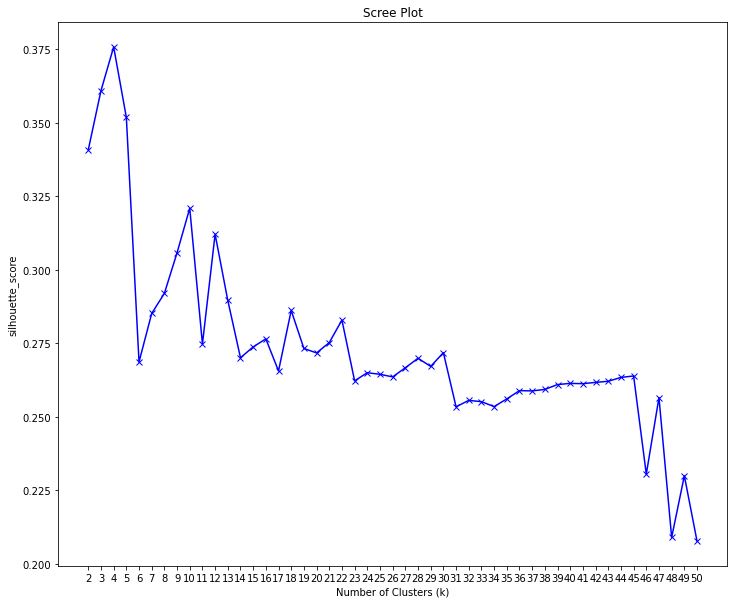

In [18]:
plt.figure(figsize=(12, 10))
plt.plot(range(2, 51), silhouette_score_list, 'bx-')
plt.xticks(np.arange(2, 51, 1))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette_score')
plt.title('Scree Plot')
plt.show()

### (b) Determine which family is the majority

#### Shown above in main for loop

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

#### Shown above in main for loop

## 3. ISLR 12.6.2

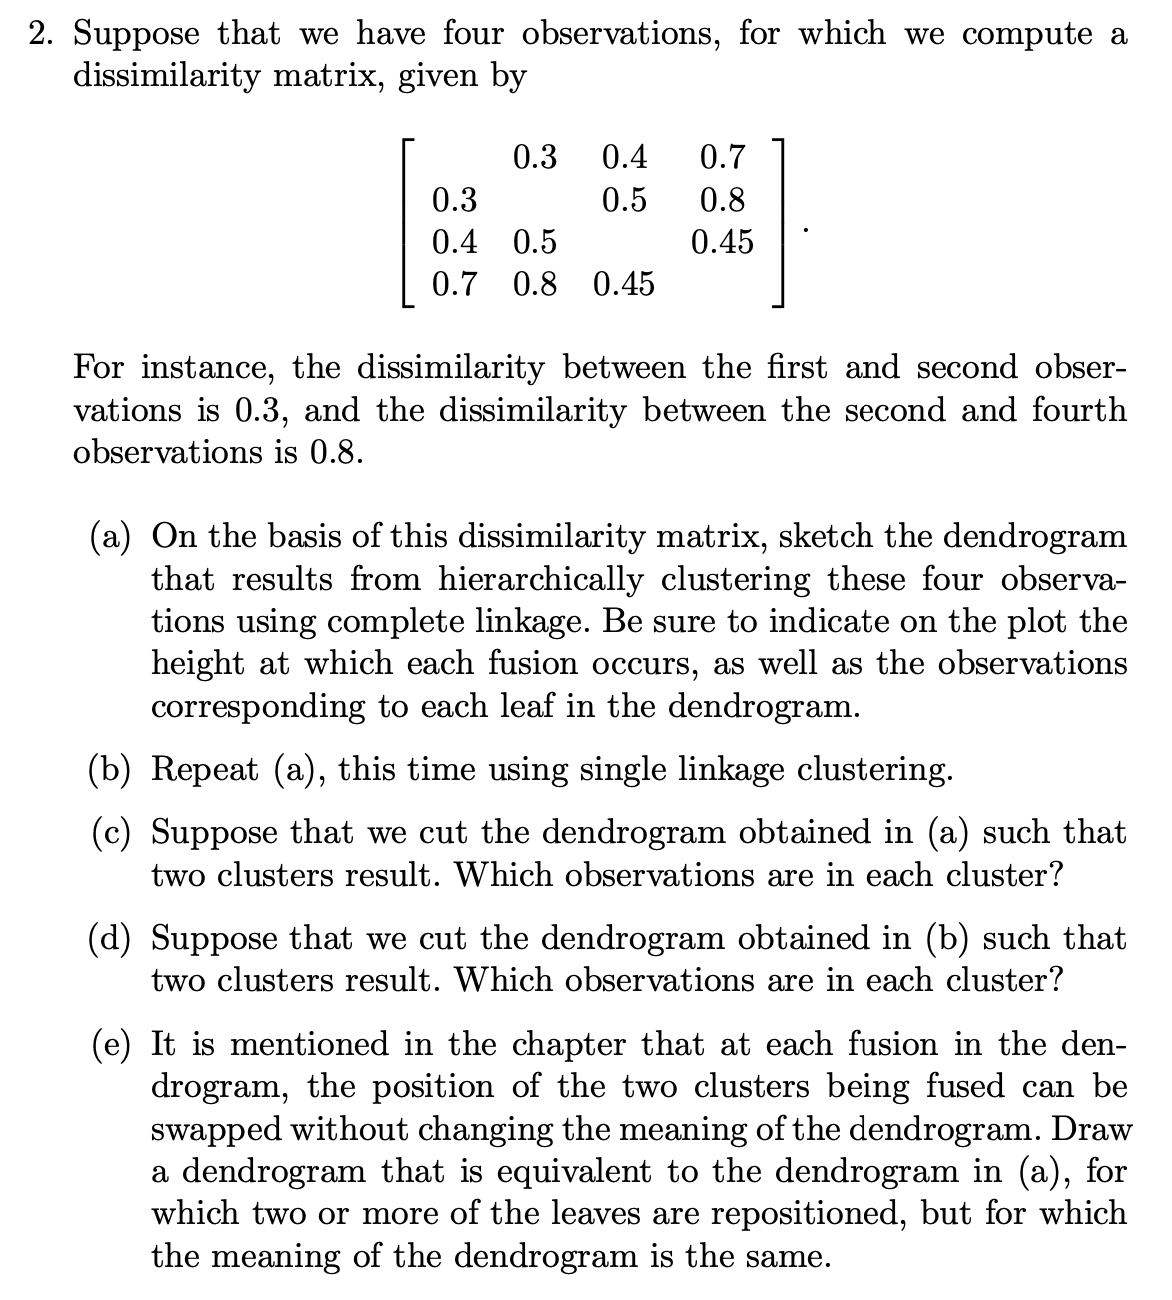

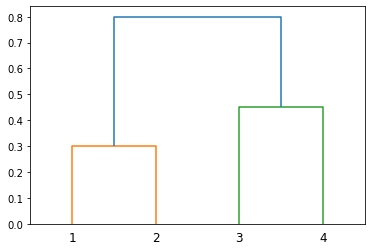

In [24]:
#a
dist_matrix = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dist = squareform(dist_matrix)
linkage_matrix = linkage(dist, "complete")
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.show()

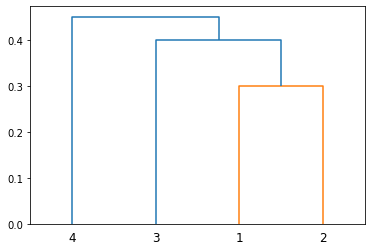

In [27]:
#b
linkage_matrix = linkage(dist, "single")
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.show()

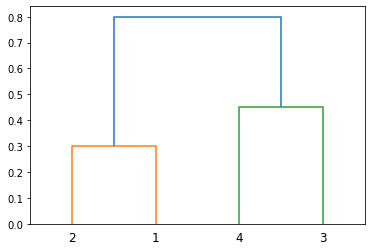

In [29]:
#c 1 and 2 in one cluster and 3 and 4 in the other.
#d 1, 2 and 3 in one cluster and 4 in the other.
#e 
dist_matrix = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dist = squareform(dist_matrix)
linkage_matrix = linkage(dist, "complete")
dendrogram(linkage_matrix, labels=["2", "1", "4", "3"])
plt.show()